### Name, info, blablabla

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%load_ext autoreload
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 14)

Populating the interactive namespace from numpy and matplotlib


# I - The Prior

#### Question 1
-Why a Gaussian likelihood is a sensible choice:
        
Mainly because of analyctical tractability... And you could argue, by the CLT, if you have no idea what the error distribution should look like, let it be normal: if we specified our model on say N completely different (and independent) populations with an unknown (but i.i.d.) error term, the average of these error terms will in the limit ($N \to \infty$) be a Gaussian.

-A spherical covariance matrix:

Just means that we have refrained from specifying the full covariance matrix. It is a special case of a diagonal covariance matrix, where all the elements are the same. It is a modeling simplification that means that instead of having to estimate the D/(D+1)/2 entries of a full diagonal matrix we only have to estimate 1 parameter ($\sigma^2$). The structure this imposes is that given all our observations, the conditional distribution of the target variable is not correlated with an arbitrary amount of other target variables ...?)

#### Question 2

We can still factor it into a product of only conditional probabilities by successively applying the chain rule:

\begin{align*}
p(\mathbf Y | f, \mathbf X) & = p(\mathbf y_1 | f, \mathbf X) p(\mathbf y_2 | \mathbf y_1 ,f, \mathbf X) p(\mathbf y_3 | \mathbf{y}_2,\mathbf{y}_1 ,f, \mathbf X)...p(\mathbf y_N | \mathbf{y}_1,\mathbf y_2,...,\mathbf y_{N-1} ,f, \mathbf X) 
\end{align*}

Where the order of the $\mathbf y_i$'s is arbitrary. In the general case, since $\mathbf y_i$ may depend on any $\mathbf x_j$ we can not factor out the individual $\mathbf x_j$'s (if we assume eqn. (2) we can factor these out since the joint distribution of the $\mathbf y's$ are independent given the $\mathbf x's$ with a diagonal covariance matrix.)

#### Question 3

If we reinvoke the independency assumption the likelihood is given by eqn. (3) in the text, where $p(\cdot)$ is the multivariate normal pdf with mean and variance according to eqn. (2)

\begin{align*}
p(\mathbf Y | \mathbf X, \mathbf W) & = \prod_{i=1}^{N} \mathcal N(\mathbf y_i |\mathbf {Wx}_i, \sigma^2 \mathbf I )  \\
    & = \prod_{i=1}^{N} \frac{1}{(2\pi)^{D/2}\sigma} \exp \left( -\frac{1}{2\sigma^2} (\mathbf y_i - \mathbf{Wx}_i)' (\mathbf y_i - \mathbf{Wx}_i ) \right)
\end{align*}

where $\mathbf W$ is $q \times D$, $\mathbf y_j$ is $D \times 1$ and $\mathbf x_j$ is $q \times 1$

#### Question 4
A prior is conjugate if the resulting posterior distribution is in the same family. This is extremely convenient as it simplifies our algebraic work (the resulting posterior may be incredible nasty depending on the chosen likelihood and prior). In general Gaussians are a family of conjugate distributions. If the likelihood and prior is Gaussian, the resulting posterior will be Gaussian. (This is by the way the reason the Kalman filter has a nice closed formed solution: for every observation we get in, the resulting posterior predictive distribution will be Gaussian...)


#### Question 5

GET BACK TO THIS


#### Question 6

First of all, for simplicity let us consider the case where $\mathbf y$ is one dimensional (I'll maintain this troughout the assignment), then eqn. (5) is a scalar valued function, and $\mathbf W := \mathbf w$ will be a $q \times 1$ vector and $\epsilon_i \sim \mathcal N(0, \sigma^2)$:

\begin{align*}
y_i = \mathbf w' \mathbf x_i + \epsilon_i
\end{align*}

The likelihood is then

\begin{align*}
    p(\mathbf Y | \mathbf X, \mathbf W) & = \prod_{i=1}^{N} \mathcal N(y_i |\mathbf {w'x}_i, \sigma^2)  \\
    & = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{1}{2\sigma^2} (y_i - \mathbf w' \mathbf x_i)^2 \right) \\
    & = \frac{1}{(2\pi\sigma^2)^{N/2}} \exp \left( -\frac{1}{2\sigma^2} (\mathbf y - \mathbf{X'w})' (\mathbf y - \mathbf{X'w} ) \right)
\end{align*}

$\mathbf X$ is the $q\times N$ observation matrix and $\mathbf y$ is $N \times 1$, the prior pdf is ($\mathbf I$: $q \times q$)

\begin{align*}
P(\mathbf w) & = \mathcal N(\mathbf w | \mathbf w_0, \tau^2 \mathbf I) \\
        & = \frac{1}{(2\pi)^{q/2}\tau} \exp \left( -\frac{1}{2\tau^2} (\mathbf w - \mathbf w_0)' (\mathbf w - \mathbf w_0 ) \right)
\end{align*}


So the posterior (eqn. (7)) is a product of two Gaussians. From the conjugancy property we know that this distribution will also be Gaussian (and we know how the expanded quadratic form should like like), we only have to figure out the terms corresponding to the mean and covariance matrix which characterizes this distribution:

\begin{align*}
p(\mathbf w | \mathbf X, \mathbf Y) &= \mathcal N(\mathbf w | \mathbf \mu_p, \mathbf \Sigma_p) \\
    & \propto  \exp \left( -\frac{1}{2\sigma^2} (\mathbf y - \mathbf{X'w})' (\mathbf y - \mathbf{X'w} ) -\frac{1}{2\tau^2} (\mathbf w - \mathbf w_0)' (\mathbf w - \mathbf w_0 ) \right) \\
    & =  \exp \left( -\frac{1}{2\sigma^2}\mathbf{y'y} + \frac{1}{\sigma^2}\mathbf{w'Xy} - \frac{1}{2\sigma^2}\mathbf{(X'w)'(X'w)}  
     -\frac{1}{2\tau^2}\mathbf{w'w} + \frac{1}{\tau^2}\mathbf{w'w_0} - \frac{1}{2\tau^2}\mathbf{w'_0w_0} \right) \\
 & =  \exp \left( \frac{1}{\sigma^2}\mathbf{w'Xy} + \frac{1}{\tau^2}\mathbf{w'w_0} - \frac{1}{2}\mathbf w'(\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I)\mathbf w  
      - \frac{1}{2\tau^2}\mathbf{w'_0w_0} -\frac{1}{2\sigma^2}\mathbf{y'y} \right) 
\end{align*}

We know how the final Gaussian should look like ($\propto (\mathbf w - \mathbf \mu_p)'\mathbf \Sigma_p^{-1}(\mathbf w - \mathbf \mu_p)=...$), we just have to complete the square and match the terms. We can identify the inverse covariance matrix from the final expression:

\begin{align*}
\mathbf \Sigma_p^{-1} = \frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I
\end{align*}

$\mu_p$ can be identified by the mixed term $\mathbf w' \mathbf \Sigma_p^{-1} \mu_p$:

\begin{align*}
\mathbf w' (\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I) \mathbf \mu_p &=  \frac{1}{\sigma^2}\mathbf{w'Xy} + \frac{1}{\tau^2}\mathbf{w'w_0} \\
  &\implies \mathbf \mu_p = (\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I)^{-1}  (\frac{1}{\sigma^2}\mathbf{Xy} + \frac{1}{\tau^2}\mathbf{w_0}) 
\end{align*}

So we have
\begin{align*}
\mathbf \Sigma_p & = (\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I)^{-1} \\
\mathbf \mu_p & = \mathbf \Sigma_p (\frac{1}{\sigma^2}\mathbf{Xy} + \frac{1}{\tau^2}\mathbf{w_0})
\end{align*}

$Z$ is just a normalization constant.

#### Question 7

Parametric vs non-parametric: the essential difference is that in a parametric model you impose structure trough your parametrization of the model and the underlying distribution. This has benefits as in aids interpretation, you can look at an estimated coefficient and say something meaningful. A non-parametric model is the opposite, here we construct our model by letting the data "decide" (trough an appropriate method) which model we end up with. Here we gain flexibility in representability as our model and (the number of) parameters are flexible. This has a disadvantage in terms of interpretability: we cannot necessarily look at the final model, pick out a coefficient, and say something meaningful (f.ex: since $\theta_1$ is bigger than 4.5 we know that (...) )  


#### Question 8

What this prior does:

So, 

Images...?

#### Question 9

Joint likelihood...

blaaa


#### Question 10

blaaaa...

### Practical

####  Question 11

See the figure below. Here we just use what we derived in Question 6. $\mathbf X$ is now a $2\times N$ matrix where the last row is just a sequence of 1's.

When the number of observations is equal to zero the posterior is the same as the prior (just look at the final equations for the mean and covariance matrix in Question 6). I chose a zero mean prior with a unit diagonal VCM, this is the first row in the plot. The first column displays the contour lines of the posterior and the right column shows 4 sampled lines from this distribution. Each row then shows the effect of doing the estimation with more data (b/c of independence and the conjugancy property this would be exactly the same as doing sequential estimating by adding 1 observation per step)

What we see is perfectly reasonable. As we incorporate more evidence, our revised belief changes accordingly: the posterior distribution variance decreases and the correlation between the slope and intercept changes to take account for what we have observed.

With the entire sample incorporated we are just as close to the population regression function as the classical ML estimator from orthodox statistics is (a general asymptotic property...)


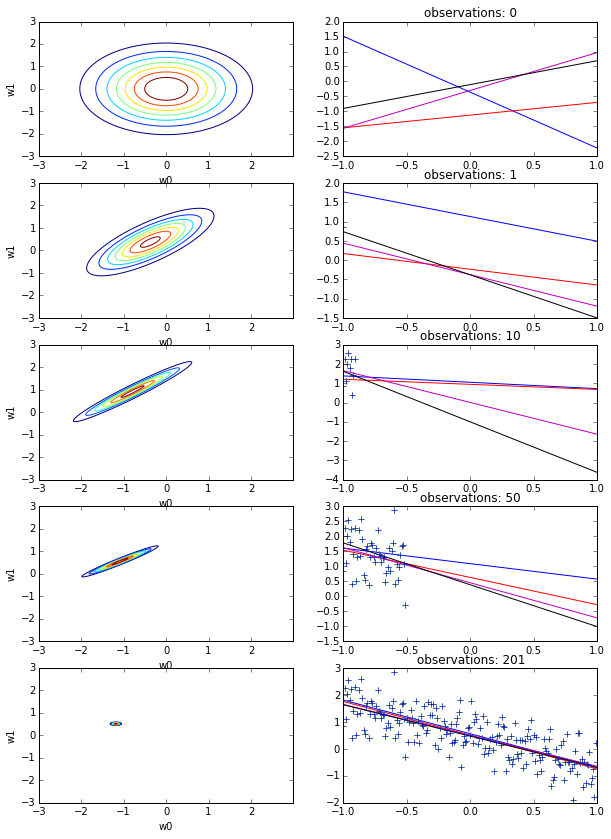

In [7]:
%autoreload 2
from code import Q11